<a href="https://colab.research.google.com/github/Thanawit-N/pulling_api/blob/main/pulling_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **set up virtual machine**
Download an imprrotant package

In [ ]:
!pip install requests

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

# **import necessary package**

In [8]:
import requests
import pandas as pd
import seaborn as sns

#**API URL and End point**

# Product Concept
5 day forecast is available at any location on the globe. It includes weather forecast data with 3-hour step.

api call
api.openweathermap.org/data/2.5/forecast?lat=**{lat}**&lon=**{lon}**&appid=**{API key}**

end point

lat	(required) Latitude for london is 51.507351

lon (required) longtitude for london is -0.127758

API key (required) Your unique API key

In [11]:
lat = '51.507351' #for latitude
lon = '-0.127758' #for longtude
API_key = open('api_key.txt').read() # for security, you should keep it secretly. in this time save in txt file.
URL = "https://api.openweathermap.org/data/2.5/forecast?lat=" + lat + "&lon=" + lon + "&appid=" + API_key
print(URL)

https://api.openweathermap.org/data/2.5/forecast?lat=51.507351&lon=-0.127758&appid=caf2eed67e571dbba84fc0d004a6ce5a


## **Pull API**

In [12]:
response = requests.get(URL).json()
print(response)
print(type(response))

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1707739200, 'main': {'temp': 281.25, 'feels_like': 278.8, 'temp_min': 281.25, 'temp_max': 281.46, 'pressure': 1005, 'sea_level': 1005, 'grnd_level': 1004, 'humidity': 76, 'temp_kf': -0.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 20}, 'wind': {'speed': 4.03, 'deg': 287, 'gust': 6.17}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-02-12 12:00:00'}, {'dt': 1707750000, 'main': {'temp': 281.59, 'feels_like': 279.04, 'temp_min': 281.59, 'temp_max': 282.27, 'pressure': 1006, 'sea_level': 1006, 'grnd_level': 1006, 'humidity': 67, 'temp_kf': -0.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 13}, 'wind': {'speed': 4.42, 'deg': 275, 'gust': 6.55}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-02-12 15:00:00'}, {'dt': 1707760800, 'main': {'temp': 280.66, 'feels_like': 27

## get meaningful data from api

refer to: https://openweathermap.org/forecast5

JSON format API response is a list of dict and the data we need is in key name "list"

In [13]:
weather_data = response['list']
print(weather_data[0])
print(type(weather_data))

{'dt': 1707739200, 'main': {'temp': 281.25, 'feels_like': 278.8, 'temp_min': 281.25, 'temp_max': 281.46, 'pressure': 1005, 'sea_level': 1005, 'grnd_level': 1004, 'humidity': 76, 'temp_kf': -0.21}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 20}, 'wind': {'speed': 4.03, 'deg': 287, 'gust': 6.17}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-02-12 12:00:00'}
<class 'list'>


# **Extract the relevant data from each time step**
Each time step in the list concist of

dt (key of dictionary contain value of time,unix)

main (key of dictionary contain value ofdictionary of feel_like, temp_min, temp_min, humidnity)

weather(key of dictionary contain value of list of dictionary of main, and description)

cloud(key of dictionary contain value of Cloudiness(%))

wind(key of dictionary contain value of wind speed and direction)

you can read the other in https://openweathermap.org/forecast5

In [14]:
weather_data = response['list']
df_data = []
for item in weather_data:
    # Extract the relevant data from each time step
    dt = item['dt']
    dt_txt = item['dt_txt']
    main = item['main']
    weather = item['weather'][0]
    clouds = item['clouds']
    wind = item['wind']

    # Create a dictionary for this time step
    item_data = {
        'dt': dt,
        'dt_txt': dt_txt,
        'temp': main['temp'],
        'feels_like': main['feels_like'],
        'temp_min': main['temp_min'],
        'temp_max': main['temp_max'],
        'humidity': main['humidity'],
        'weather_main': weather['main'],
        'weather_description': weather['description'],
        'clouds': clouds['all'],
        'wind_speed': wind['speed'],
        'wind_deg': wind['deg'],
    }

    # Add the item data to the list
    df_data.append(item_data)

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(df_data)

print(df)

            dt               dt_txt    temp  feels_like  temp_min  temp_max  \
0   1707739200  2024-02-12 12:00:00  281.25      278.80    281.25    281.46   
1   1707750000  2024-02-12 15:00:00  281.59      279.04    281.59    282.27   
2   1707760800  2024-02-12 18:00:00  280.66      278.40    280.36    280.66   
3   1707771600  2024-02-12 21:00:00  279.46      276.63    279.46    279.46   
4   1707782400  2024-02-13 00:00:00  279.41      276.35    279.41    279.41   
5   1707793200  2024-02-13 03:00:00  279.02      276.13    279.02    279.02   
6   1707804000  2024-02-13 06:00:00  278.55      276.47    278.55    278.55   
7   1707814800  2024-02-13 09:00:00  280.15      277.75    280.15    280.15   
8   1707825600  2024-02-13 12:00:00  283.11      280.43    283.11    283.11   
9   1707836400  2024-02-13 15:00:00  281.03      277.83    281.03    281.03   
10  1707847200  2024-02-13 18:00:00  283.00      280.14    283.00    283.00   
11  1707858000  2024-02-13 21:00:00  284.17      283

# **Save file**

In [15]:
# save to weather.csv
df.to_csv('weather.csv', index= False)

# **Open file**

In [16]:
data = pd.read_csv("/content/weather.csv")
print(data.head)

<bound method NDFrame.head of             dt               dt_txt    temp  feels_like  temp_min  temp_max  \
0   1707739200  2024-02-12 12:00:00  281.25      278.80    281.25    281.46   
1   1707750000  2024-02-12 15:00:00  281.59      279.04    281.59    282.27   
2   1707760800  2024-02-12 18:00:00  280.66      278.40    280.36    280.66   
3   1707771600  2024-02-12 21:00:00  279.46      276.63    279.46    279.46   
4   1707782400  2024-02-13 00:00:00  279.41      276.35    279.41    279.41   
5   1707793200  2024-02-13 03:00:00  279.02      276.13    279.02    279.02   
6   1707804000  2024-02-13 06:00:00  278.55      276.47    278.55    278.55   
7   1707814800  2024-02-13 09:00:00  280.15      277.75    280.15    280.15   
8   1707825600  2024-02-13 12:00:00  283.11      280.43    283.11    283.11   
9   1707836400  2024-02-13 15:00:00  281.03      277.83    281.03    281.03   
10  1707847200  2024-02-13 18:00:00  283.00      280.14    283.00    283.00   
11  1707858000  2024-0

# ** Summarizing the data**
 get the data types and columns information

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   40 non-null     int64  
 1   dt_txt               40 non-null     object 
 2   temp                 40 non-null     float64
 3   feels_like           40 non-null     float64
 4   temp_min             40 non-null     float64
 5   temp_max             40 non-null     float64
 6   humidity             40 non-null     int64  
 7   weather_main         40 non-null     object 
 8   weather_description  40 non-null     object 
 9   clouds               40 non-null     int64  
 10  wind_speed           40 non-null     float64
 11  wind_deg             40 non-null     int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 3.9+ KB


elaborates the type of data and its attributes.

In [23]:
data.describe()

,dt,temp,feels_like,temp_min,temp_max,humidity,clouds,wind_speed,wind_deg
count,4.000000e+01,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,1.707950e+09,283.414250,282.288000,283.406750,283.436500,84.700000,88.67500,3.694250,227.375000
std,1.262569e+05,2.097483,2.979001,2.108094,2.079662,10.056762,24.75872,1.290456,31.142096
min,1.707739e+09,278.550000,276.130000,278.550000,278.550000,67.000000,11.00000,1.780000,173.000000
25%,1.707844e+09,282.417500,280.357500,282.417500,282.417500,76.750000,91.75000,2.772500,208.750000
50%,1.707950e+09,284.045000,283.530000,284.045000,284.045000,87.500000,100.00000,3.485000,222.000000
75%,1.708055e+09,284.617500,284.167500,284.617500,284.617500,93.000000,100.00000,4.455000,237.500000
max,1.708160e+09,287.320000,286.990000,287.320000,287.320000,97.000000,100.00000,6.200000,295.000000


for find the relation between two variable

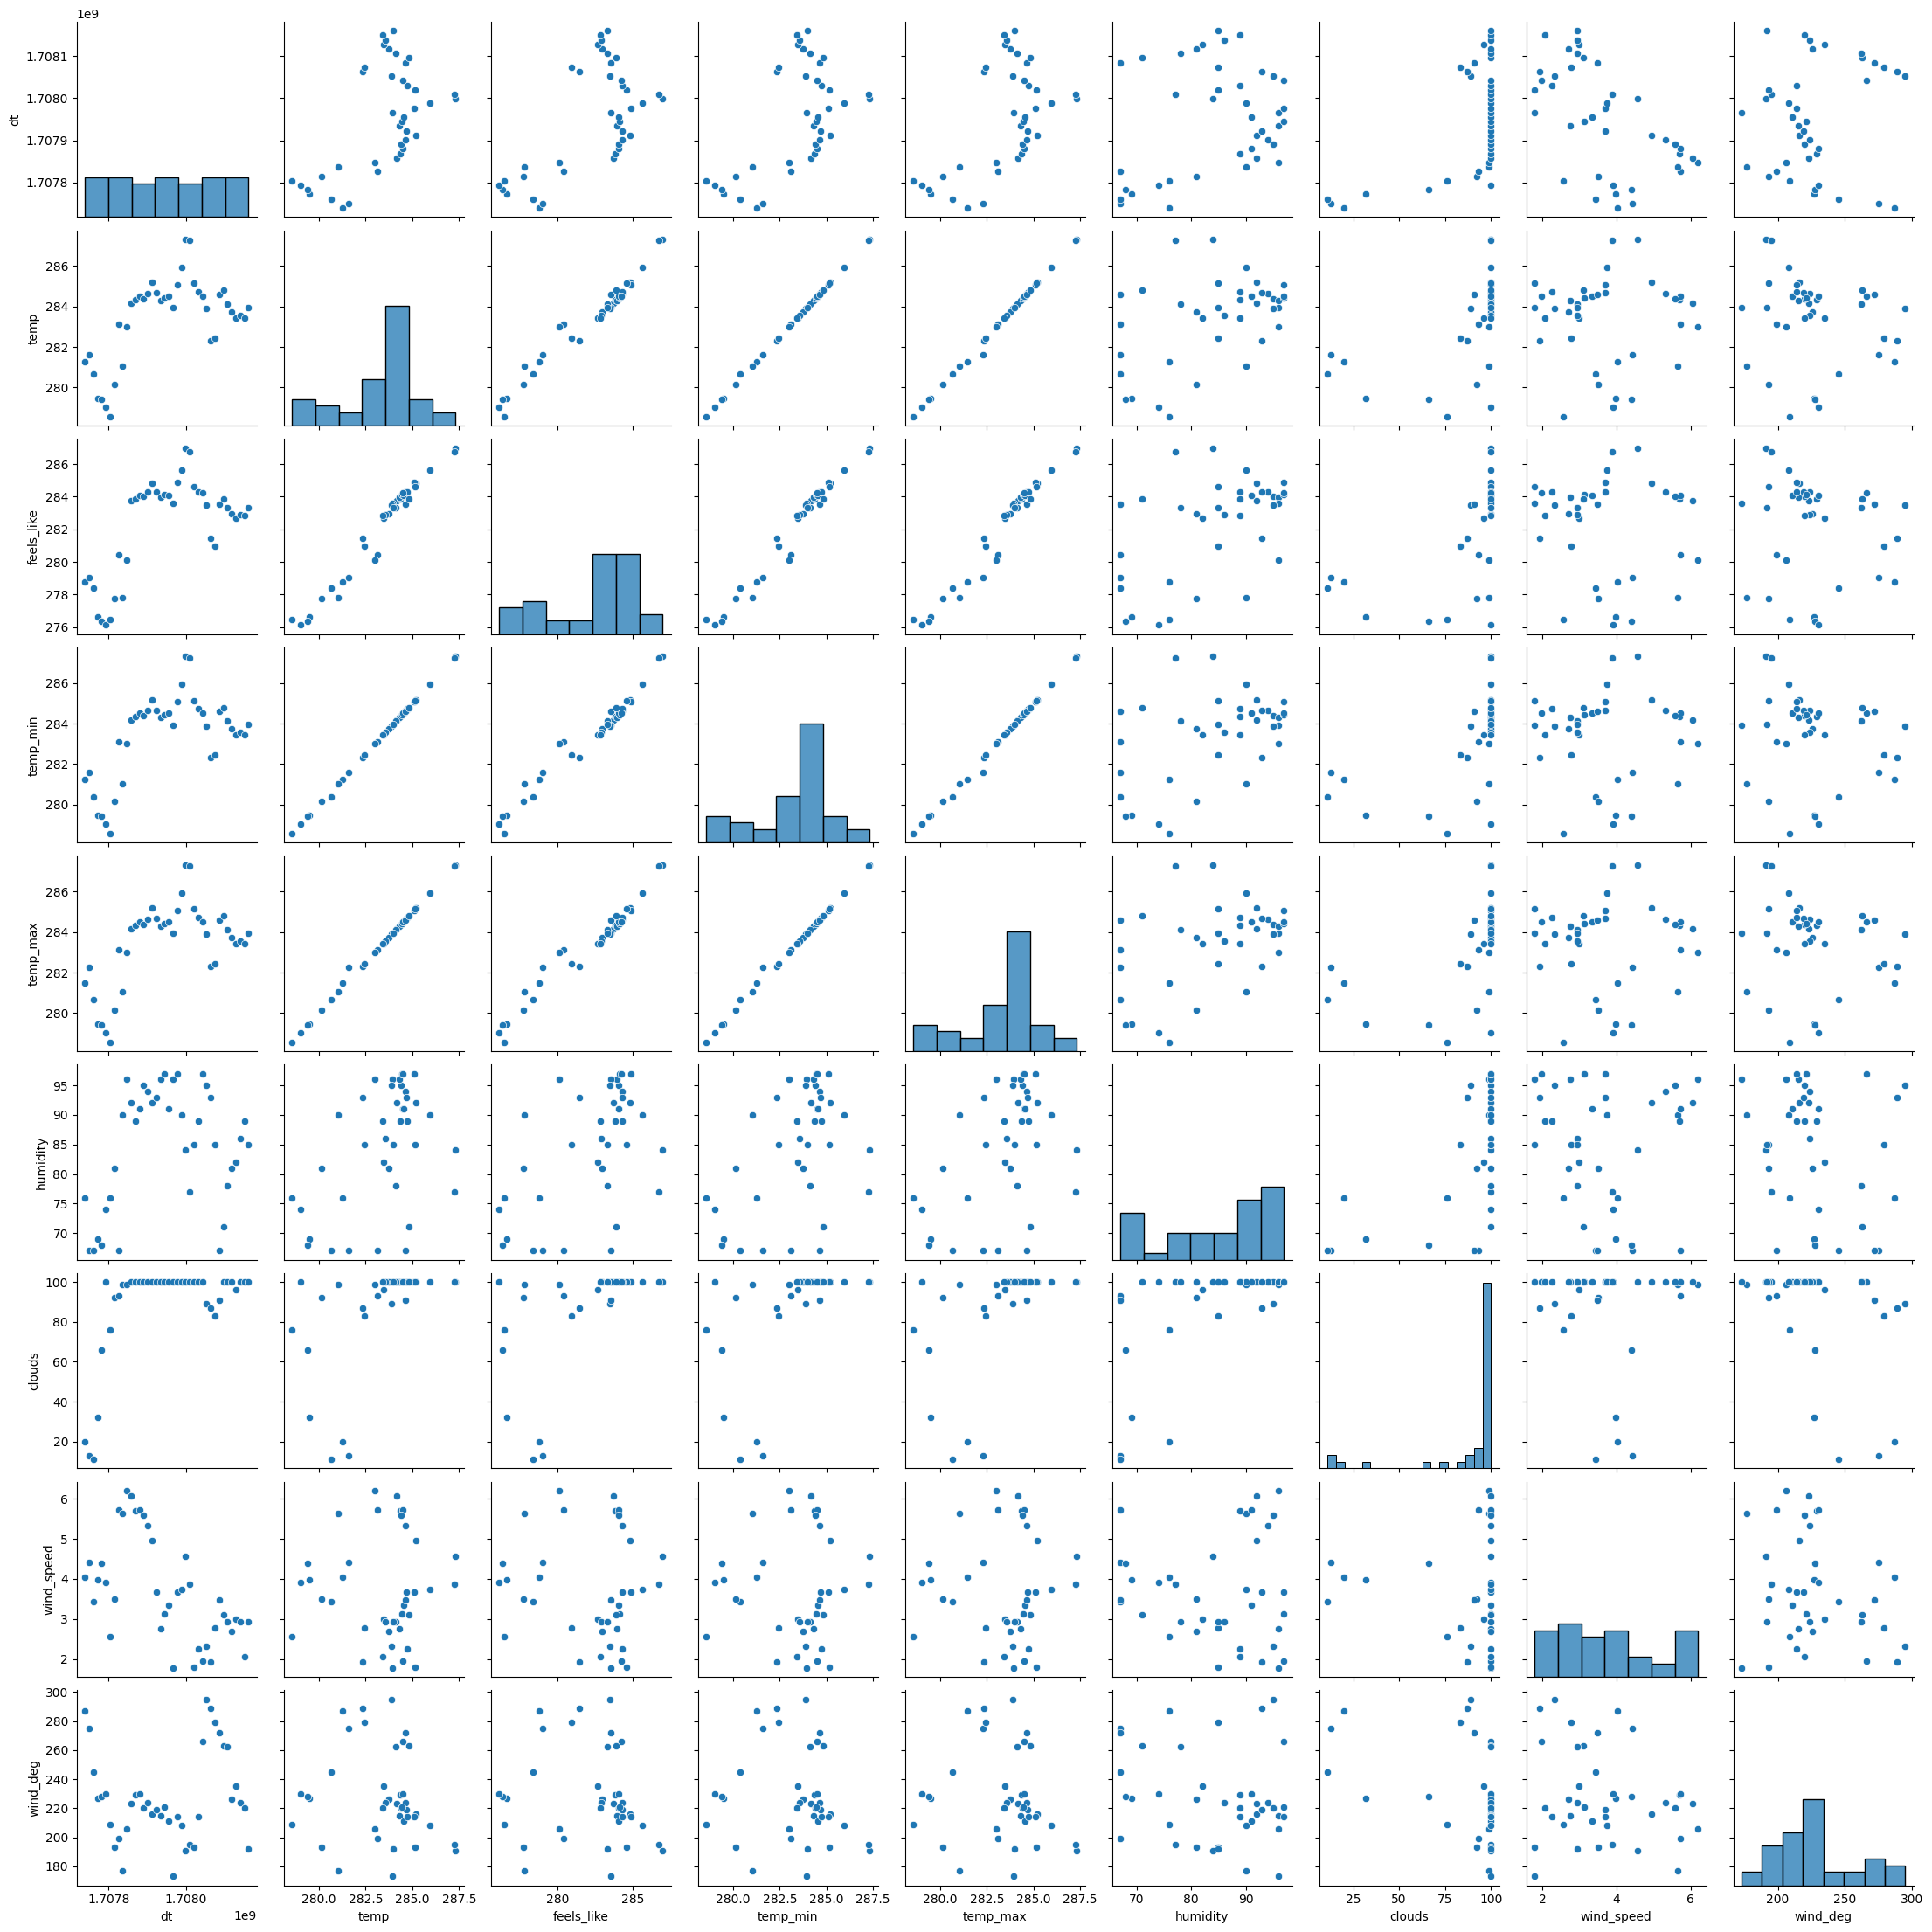

In [18]:
sns.pairplot(data)